# Homework 2: Bayes Optimal Classifiers

Created: 10/07/2023 by Tom Lever

Updated: 10/07/2023 by Tom Lever

"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79,354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored...[, including an indicator of whether or not] there was a success (the target variable). For the whole database considered, there were 6,499 successes."

Our data frame consists of 45,211 contacts, 5,289 of whom accepted the deposit application.

In [1]:
# read the data as a dataframe
import pandas as pd
df = pd.read_csv ('Data_Frame_Of_Info_For_Contacts_And_Indicators_Of_Whether_Contact_Established_Account.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Subset to only the columns we care about:

In [2]:
df = df[['age', 'balance', 'duration', 'y']]
df

,age,balance,duration,y
0,58,2143,261,no
1,44,29,151,no
2,33,2,76,no
3,47,1506,92,no
4,33,1,198,no
...,...,...,...,...
45206,51,825,977,yes
45207,71,1729,456,yes
45208,72,5715,1127,yes
45209,57,668,508,no


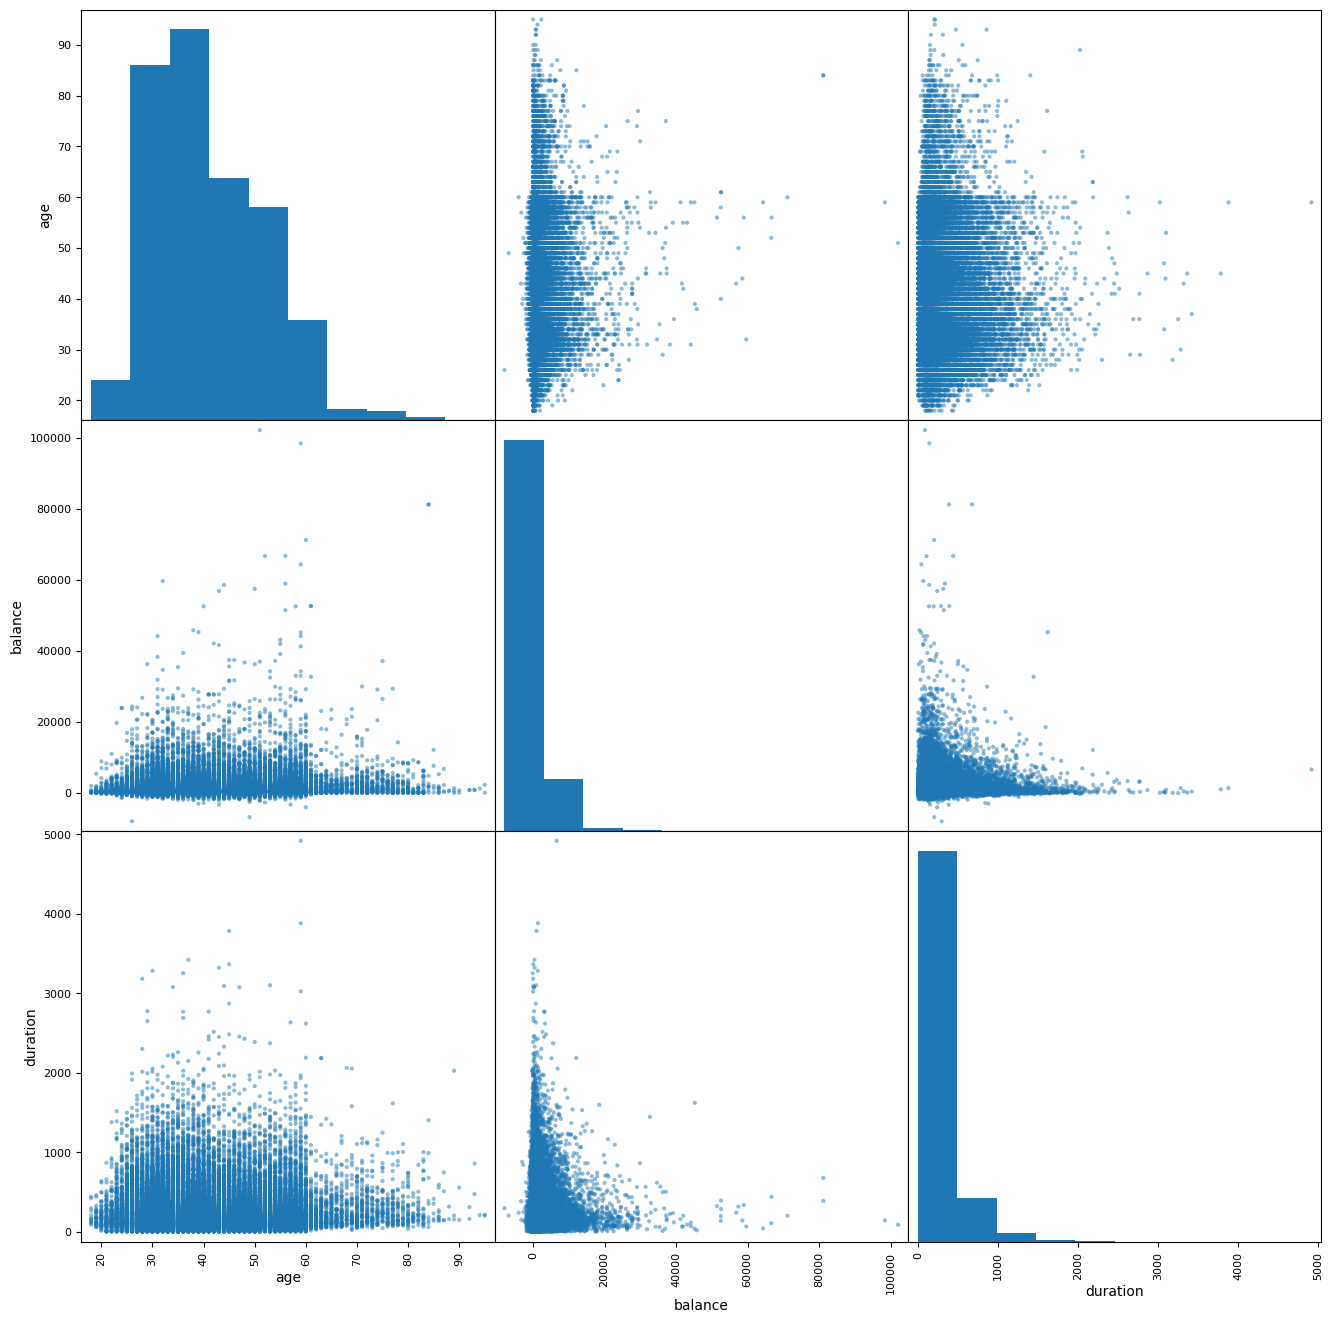

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [16, 16]
scatter_matrix(df)
# histogram of age, balance, and duration along diagonal
plt.show()

In [4]:
# check all the values in the y columns:
import numpy as np
print(np.unique(df[['y']]))

['no' 'yes']


Example code on how to compute the covariance matrix:

In [5]:
X = df[['age', 'balance', 'duration']].to_numpy()
C = np.cov(np.transpose(X))
C

array([[ 1.12758107e+02,  3.16147670e+03, -1.27117159e+01],
       [ 3.16147670e+03,  9.27059895e+06,  1.69057505e+04],
       [-1.27117159e+01,  1.69057505e+04,  6.63205741e+04]])

In [6]:
np.sqrt(C[0,0])
# Variance for age, balance, and duration along diagonal
# This number is standard deviation of age

10.618762040975422

In [7]:
np.std(df[['age']].to_numpy())

10.618644604723631

We create Bayes Optimal Decision Rules, which are functions.

# Homework #2 part (a), i
Assume Gaussian class conditional likelihoods with unequal variance-covariance matrices with each of the following additional assumptions applied singularly to each decision rule in this class:

i.  Equal class priors and equal costs for misclassification;

[NOTE:  The problem says to "create Bayes optimal decision rules" which we do by creating the functions and applying to the input data X.]

In [8]:
df['y'] == 'yes'

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y, Length: 45211, dtype: bool

In [9]:
# select yes/no subsets by condition on rows (https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)
df_n = df[df['y'] == 'no']
df_y = df[df['y'] == 'yes']
df_n

,age,balance,duration,y
0,58,2143,261,no
1,44,29,151,no
2,33,2,76,no
3,47,1506,92,no
4,33,1,198,no
...,...,...,...,...
45194,59,138,162,no
45198,37,1428,333,no
45199,34,1475,1166,no
45209,57,668,508,no


In [10]:
df_y

,age,balance,duration,y
83,59,2343,1042,yes
86,56,45,1467,yes
87,41,1270,1389,yes
129,55,2476,579,yes
168,54,184,673,yes
...,...,...,...,...
45204,73,2850,300,yes
45205,25,505,386,yes
45206,51,825,977,yes
45207,71,1729,456,yes


In [11]:
# comput the mean and coviarnace for the yes class
X_y = df_y[['age', 'balance', 'duration']].to_numpy()
print(type(X_y))
C_y = np.cov(np.transpose(X_y))
print(type(C_y))
m_y = np.mean(X_y, axis=0)
print(type(m_y))

# comput the mean and coviarnace for the no class
X_n = df_n[['age', 'balance', 'duration']].to_numpy()
C_n = np.cov(np.transpose(X_n))
m_n = np.mean(X_n, axis=0)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
print(m_n)

[  40.83898602 1303.71496919  221.18280647]


In [13]:
print(m_y)
print(C_y)

[  41.67006996 1804.26791454  537.29457364]
[[ 1.82190104e+02  5.77613361e+03 -1.48326015e+02]
 [ 5.77613361e+03  1.22577347e+07 -5.04046434e+04]
 [-1.48326015e+02 -5.04046434e+04  1.54076082e+05]]


In [14]:
# compute likelihoods
from scipy.stats import multivariate_normal

likelihoods_y = multivariate_normal.pdf(X, mean=m_y, cov=C_y)
likelihoods_n = multivariate_normal.pdf(X, mean=m_n, cov=C_n)
print(type(likelihoods_y))

<class 'numpy.ndarray'>


In [15]:
import numpy as np
import pandas as pd
import scipy
def predict_whether_or_not_contact_will_establish_account(X):
    data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account = pd.read_csv('Data_Frame_Of_Info_For_Contacts_And_Indicators_Of_Whether_Contact_Established_Account.csv', sep=';')
    mask_for_selecting_contacts_that_established_accounts = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account['y'] == 'yes'
    data_frame_of_info_for_contacts_and_indicators_that_contact_established_account = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account[mask_for_selecting_contacts_that_established_accounts]
    array_of_ages_balances_and_durations_for_contacts_that_established_accounts = data_frame_of_info_for_contacts_and_indicators_that_contact_established_account[['age', 'balance', 'duration']].to_numpy()
    array_of_means_of_age_balance_and_duration_for_contacts_who_established_accounts = np.mean(array_of_ages_balances_and_durations_for_contacts_that_established_accounts, axis = 0)
    array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_accounts = np.cov(np.transpose(array_of_ages_balances_and_durations_for_contacts_that_established_accounts))
    array_of_likelihoods_that_contact_will_establish_account = scipy.stats.multivariate_normal.pdf(
        X,
        mean = array_of_means_of_age_balance_and_duration_for_contacts_who_established_accounts,
        cov = array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_accounts
    )
    return array_of_likelihoods_that_contact_will_establish_account
data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account = pd.read_csv('Data_Frame_Of_Info_For_Contacts_And_Indicators_Of_Whether_Contact_Established_Account.csv', sep=';')
array_of_ages_balances_and_durations = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account[['age', 'balance', 'duration']].to_numpy()
array_of_likelihoods_that_contact_will_establish_account = predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations)
print(array_of_likelihoods_that_contact_will_establish_account)
print(len(array_of_likelihoods_that_contact_will_establish_account))

[1.32280586e-09 1.79392021e-09 1.22771655e-09 ... 5.40364244e-11
 1.62145963e-09 2.73963355e-09]
45211


In [16]:
for i in range(20):
    print([likelihoods_y[i],likelihoods_n[i]])

[1.3228058603589212e-09, 2.3759731985689037e-09]
[1.793920205021604e-09, 8.257992809829403e-09]
[1.2277165486936172e-09, 5.504764997056348e-09]
[1.673117077279356e-09, 6.998369430696493e-09]
[1.7036486049284167e-09, 7.007773947536751e-09]
[1.6429805540604485e-09, 7.587341580938874e-09]
[1.3855132177217318e-09, 4.512131411915523e-09]
[2.760119179085247e-09, 6.7676189176601836e-09]
[6.377112719138375e-10, 1.5278945335607159e-09]
[1.493678885304852e-09, 7.001720409496124e-09]
[2.2405828980082904e-09, 9.556530503230233e-09]
[1.2183477438289464e-09, 4.637298191213983e-09]
[1.9991682633198926e-09, 1.49997366390845e-09]
[6.735294633219138e-10, 1.6326973448476447e-09]
[9.877963813269392e-10, 2.448319676561215e-09]
[2.1070613189974774e-09, 4.4949745337475405e-09]
[1.5208587667286832e-09, 7.051100068260172e-09]
[6.629749110333398e-10, 1.6958225189676603e-09]
[7.994143134279669e-10, 1.4461630376561705e-09]
[1.1450810409160382e-09, 5.07829323952385e-09]


In [17]:
print(len(likelihoods_y))

45211


In [18]:
prior_y = 0.5
prior_n = 0.5

In [19]:
probabilities_y = (likelihoods_y*prior_y)/(likelihoods_y*prior_y + likelihoods_n*prior_n)
probabilities_n = (likelihoods_n*prior_n)/(likelihoods_y*prior_y + likelihoods_n*prior_n)

In [20]:
for i in range(20000,20000+10):
    print([probabilities_y[i],probabilities_n[i]], df['y'][i])

[0.18670820235797364, 0.8132917976420263] no
[0.1777049011280699, 0.8222950988719301] no
[0.44811105344869245, 0.5518889465513076] no
[0.30514918194152646, 0.6948508180584736] no
[0.18654911429683696, 0.813450885703163] no
[0.17598084179838144, 0.8240191582016185] no
[0.23494206460993325, 0.7650579353900667] no
[0.5260596777021603, 0.4739403222978397] no
[0.2043512659961878, 0.7956487340038122] no
[0.8763102606986292, 0.1236897393013708] yes


Eventually you will compute cost for each misclassificaiton type as follows:

In [21]:
cost_yes_as_yes = 0
cost_no_as_yes = 10
cost_yes_as_no = 10
cost_no_as_no = 0

In [22]:
# compute the expected value for the cost for labeling as 'yes'
cost_yes = probabilities_y*cost_yes_as_yes + probabilities_n*cost_no_as_yes

# compute the expected value for the cost for labeling as 'no'
cost_no = probabilities_y*cost_yes_as_no + probabilities_n*cost_no_as_no

In [23]:
for i in range(20000,20000+10):
    print([cost_yes[i],cost_no[i]], df['y'][i])

[8.132917976420263, 1.8670820235797363] no
[8.222950988719301, 1.777049011280699] no
[5.518889465513076, 4.481110534486924] no
[6.948508180584736, 3.0514918194152645] no
[8.13450885703163, 1.8654911429683696] no
[8.240191582016186, 1.7598084179838145] no
[7.6505793539006675, 2.3494206460993325] no
[4.739403222978397, 5.260596777021603] no
[7.956487340038122, 2.043512659961878] no
[1.236897393013708, 8.763102606986292] yes


Text(0.5, 1.0, 'Costs for Classification as Yes and No With Actual Outcomes, sorted by P(yes)')

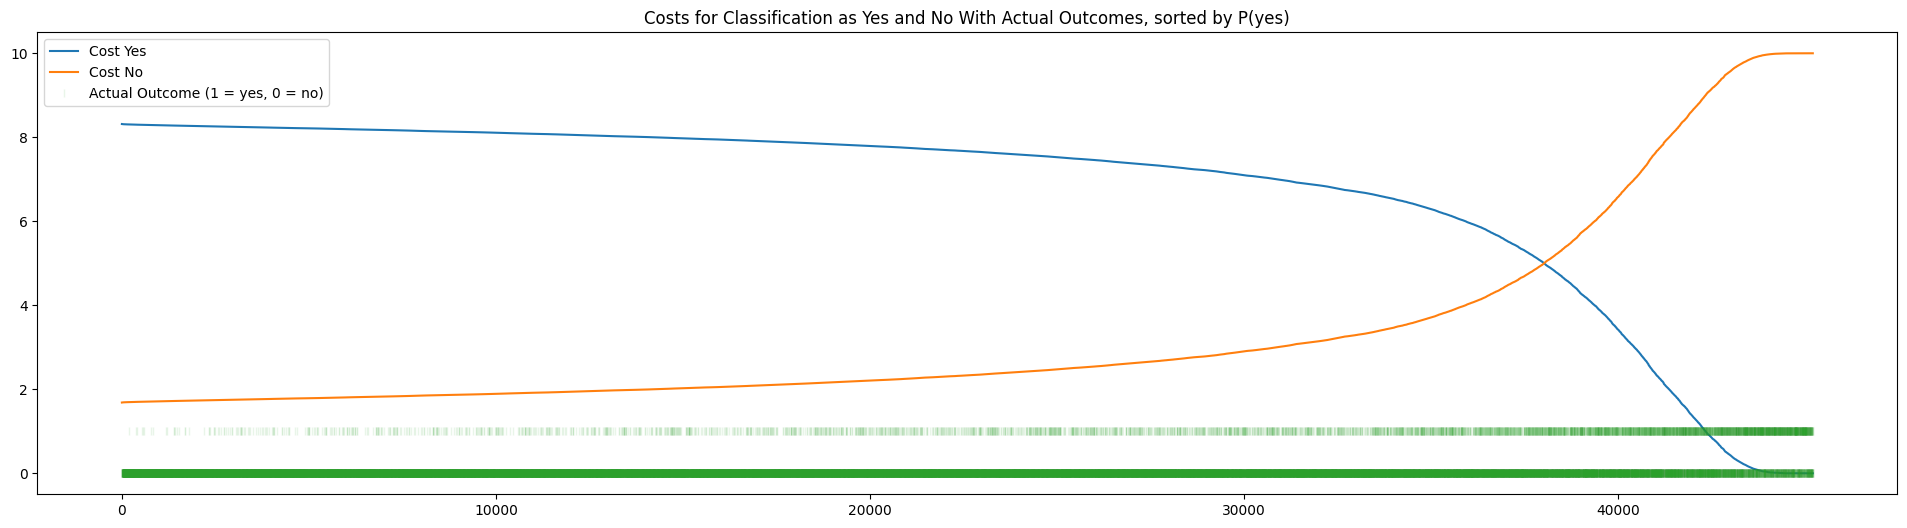

In [24]:
fig = plt.figure(figsize=(24,6))
plt.plot(cost_yes[np.argsort(probabilities_y)],label='Cost Yes')
plt.plot(cost_no[np.argsort(probabilities_y)],label='Cost No')
y_numerical= np.asarray([df[['y']]=='yes']).flatten()
plt.plot(y_numerical[np.argsort(probabilities_y)],linestyle='None', marker = '|',label='Actual Outcome (1 = yes, 0 = no)', alpha=0.1)
plt.legend()
plt.title('Costs for Classification as Yes and No With Actual Outcomes, sorted by P(yes)')

BAYES OPTIOMAL SOLUTION:  Categorize every person to the right of the yes-no intersection as a yes will minimize cost.****